# AST 502 Lecture 10: Principle Component Analysis (PCA)

## Paul Rogozenski

## Chapters: 7.1-7.3.1

## Motivation: How hard is it to find your dream car?

Assume that a fraction of all possible cars $r < 1$ exist within a certain criteria. 

For example, say you want a fast car and that is your only criteria. Your selection probability for choosing a fast car is $r$. 

Now, what if you want a fast, red, 8-cylinder car with a leather interior; your selection probability is now $r^4$.

The more selection criteria you choose, the harder it is to find your ideal car!

## The Curse of Dimensionality

A more mathematical approach: say you are picking a point in a 2-unit square. 
What is the probability of picking a point inside a unit circle?

$$f_2 = \frac{\pi r^2}{(2r)^2} = \frac{\pi}{4} \approx 78.5\%$$

Now say you are picking a point in a 2-unit cube.
What is the probability of picking a point inside a unit sphere?

$$f_3 = \frac{\frac{4}{3}\pi r^3}{(2r)^3} = \frac{\pi}{6} \approx 52.3\% $$

In general, picking a point in a D-dimensional 2-unit hypercube that lands in a D-dimensional unit hypersphere is given as:
    
$$f_D = \frac{\pi^{D/2}}{D 2^{D-1}\Gamma(D/2)}$$

One must increase the number of samples *exponentially* with dimension in order to pick a point within the D-dimensional hypersphere.

In fact, $\lim_{D \to +\infty}f_D = 0$, making it **nearly impossible** to pick a point for large dimensions.

## The Curse of Dimensionality: SDSS

SDSS has 357 million sources, each with 448 measured attributes. 

Given our previous calculation, the probability that one of the sources lands in our unit hypersphere of only 30 considered dimensions is $7.14 \times 10^{-4}\%$

## Reducing Dimensionality through Principle Component Analysis (PCA)

A large number of dimensions make characterizing data difficult. But *not all data have equal contribution* to the principle physical/measured correlations.

Identifying components which most greatly affect the variance capture the significant information for the problem at hand, thus identifying our Principle Components.

Principle Components are linearly uncorrelated and yield zero covariance.

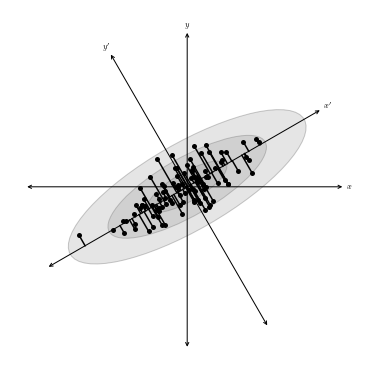

In [1]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Set parameters and draw the random sample
np.random.seed(42)
r = 0.9

sigma1 = 0.25
sigma2 = 0.08
rotation = np.pi / 6
s = np.sin(rotation)
c = np.cos(rotation)

X = np.random.normal(0, [sigma1, sigma2], size=(100, 2)).T
R = np.array([[c, -s],
              [s, c]])
X = np.dot(R, X)

#------------------------------------------------------------
# Plot the diagram
fig = plt.figure(figsize=(5, 5), facecolor='w')
ax = plt.axes((0, 0, 1, 1), xticks=[], yticks=[], frameon=False)

# draw axes
ax.annotate(r'$x$', (-r, 0), (r, 0),
            ha='center', va='center',
            arrowprops=dict(arrowstyle='<->', color='k', lw=1))
ax.annotate(r'$y$', (0, -r), (0, r),
            ha='center', va='center',
            arrowprops=dict(arrowstyle='<->', color='k', lw=1))

# draw rotated axes
ax.annotate(r'$x^\prime$', (-r * c, -r * s), (r * c, r * s),
            ha='center', va='center',
            arrowprops=dict(color='k', arrowstyle='<->', lw=1))
ax.annotate(r'$y^\prime$', (r * s, -r * c), (-r * s, r * c),
            ha='center', va='center',
            arrowprops=dict(color='k', arrowstyle='<->', lw=1))

# scatter points
ax.scatter(X[0], X[1], s=25, lw=0, c='k', zorder=2)

# draw lines
vnorm = np.array([s, -c])
for v in (X.T):
    d = np.dot(v, vnorm)
    v1 = v - d * vnorm
    ax.plot([v[0], v1[0]], [v[1], v1[1]], '-k')

# draw ellipses
for sigma in (1, 2, 3):
    ax.add_patch(Ellipse((0, 0), 2 * sigma * sigma1, 2 * sigma * sigma2,
                         rotation * 180. / np.pi,
                         ec='k', fc='gray', alpha=0.2, zorder=1))

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.show()

## PCA Definitions

$X$: The $N\times K$ matrix of $K$ observables and N observations. For each $\{x_i\}$ in $X$, the mean is subtracted.

$C_X \equiv \frac{1}{N-1} X^T X$: The $K\times K$ sample covariance

We would like to find the projection, $R$, about which there our axes denote the directions of maximal variance. Definine $Y = XR$, we see

$$C_Y = \frac{1}{N-1}Y^T Y = \frac{1}{N-1} R^T X^T X R = R^T C_X R$$

## PCA Derivations

The first principal component, $r_1$ , of $R$ is defined as the projection with the maximal variance (subject to the constraint that $r_1^T r_1 = 1$).

We derive the first Principle Component using Lagrange multipliers and defining the cost function $\phi(r_1, \lambda_1)$ as:

$$\phi(r_1, \lambda_1) = r_1^T C_X r_1 - \lambda_1 (r_1^Tr_1 - 1)$$

Taking the derivative of the cost function to be zero yields

$$C_X r_1 - \lambda_1 r_1 = 0$$

Solving the root yields $\lambda_1 = r_1^T C_X r_1$, the eigenvalue of the covariance matrix. The first Principle Component is the largest eigenvalue of the covariance matrix, and $r_1$ its eigenvector. Note that since this is an eigenvector, the Principle Components are uncorrelated (i.e. $r_2^T C_X r_1 = 0$). 

Ordering $\{r_i\}$ into the columns of $R$ and knowing the diagonal values of $C_Y$ define the amount of variance in each component, we define the set of principle components as:

$$C_X = R C_Y R^T$$


## Efficient Computation of Principle Components

Finding eigenvalues for large number of parameters can be computationally costly. We don't always need to explicitly compute $C_X$.

(Scaled) Single Value Decomposition (SVD) offers an alternative approach. Given the $N \times K$ matrix, $X$, defining $P = \min(N,K)$, and constraining $V^TV=U^TU=I$, let us first define the following:
    
$$U \Sigma V^T = \frac{1}{\sqrt{N-1}} X$$,

$U$: columns are the left signular vectors, [$N \times P$]

$V$: columns are the right singular vectors, [$K \times P$]

$\Sigma$: square diagonal matrix of singular values, [$P \times P$]

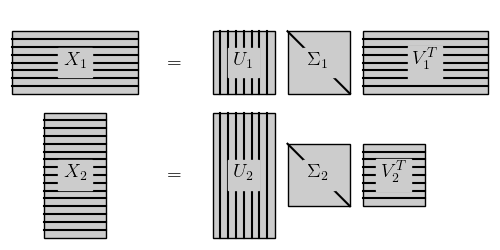


The columns of $U$ and $T$ form an orthonormal basis. Through substitution, it is simple to show:

$$C_X = \bigg[ \frac{1}{\sqrt{N-1}}X\bigg]^T\bigg[ \frac{1}{\sqrt{N-1}}X\bigg]
    =V \Sigma U^T U \Sigma V^T
    =V \Sigma^2 V^T$$
    
By analogy, we see that the right signular vectors of $V$ correspond to the principle components of $R$ and the diagonal matrix of eigenvalues $C_Y$ is equal to the square of the singular values, $\Sigma^2 = C_Y$.

The correlation matrix may also be derived through SVD. 

$$M_X = \frac{1}{N-1}X X^T
    = U \Sigma V^T V \Sigma U^T
    = U \Sigma^2 U^T$$
    
We see that $U$ corresponds to the eigenvectors of the correlation matrix, which has the same eigenvalues as the covariance matrix.

The orthonormality of the matrices allows us to find $V$ if $U$ is known and vice versa.

$$R = V = \frac{1}{\sqrt{N-1}}X^T U \Sigma^{-1}$$

In [2]:
import numpy as np
np.random.seed(42)
X = np.random.random((100,3))
CX = np.dot(X.T, X)
U, Sdiag, VT = np.linalg.svd(X, full_matrices = False)
#full_matrices = False maintains the square singular value matrix.
#Setting to true will make V square.
CYdiag, R = np.linalg.eigh(CX)
print(np.allclose(CYdiag, Sdiag[::-1]**2))
print(VT[::-1].T/R)

True
[[ 1. -1.  1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]]


## Guidlines for efficient PCA computation

- If $N \gg K$, use the eigenvalue decomposition of $C_X$
- If $N \ll K$, use the $N \times N$ correlation matrix
- If $N \sim K$, use the direct computation of the SVD of $X$

## How many PC's should I include?

## What are the applications of PCA's?

## What useful information lies in the PCA's?